# Desafio Ifood | E.B.A - Estatística do Básico ao Avançado

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

- Perfis de clientes
- Preferências do produto
- Sucessos/fracassos da campanha
- Desempenho do canal

###### Objetivos:

- Realizar análise exploratória
- Entender o perfil dos clientes
- Entender como os dados se correlacionam



## - Análise Exploratória

In [4]:
# Importação das bibliotecas para manipulação de tabelas (pandas), operações (numpy) e manipulação de gráficos (seaborn e matplotlib)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv ("mkt_data.csv")

In [6]:
# Visualização do arquivo
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


### Quantos dados temos? 

In [8]:
df.shape

(2205, 44)

Este dataframe possui 2205 linhas e 44 colunas.

### Quais são as colunas numéricas?

In [11]:
# Exibição de todos os tipos de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

As colunas numéricas são as do tipo "int64" e "float64". Enquanto as colunas do tipo "object" são categóricas.

**Neste conjunto de dados, as colunas numéricas são:**

In [14]:
numericas = [ 'int64' , 'float64' ]
df.select_dtypes(include=numericas).columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses'],
      dtype='object')

### Temos duplicados na nossa base? Se tivermos, retire-os 

In [16]:
# Soma dos dados duplicados
df.duplicated().sum()

0

Não há dados duplicados neste dataframe.

### Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles? 

In [19]:
# Soma dos dados nulos
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

As colunas que apresentam dados nulos são:
- marital_Divorced
- marital_Married
- marital_Single
- marital_Together
- marital_Widow
- education_2n Cycle
- education_Basic
- education_Graduation
- education_Master
- education_PhD

Analisando a nomenclatura das colunas que possuem valores nulos, é possível verificar que se tratam de colunas de variáveis categóricas nominais de estado civil (marital_x) e nível educacional (education_x). É possível que estes valores nulos representem que aquele indivíduo possui ou não a característica da coluna.

In [22]:
# Contando as ocorrências de um valor na coluna marital_Divorced
df.marital_Divorced.value_counts()

marital_Divorced
1.0    230
Name: count, dtype: int64

In [23]:
# Contando as ocorrências de um valor na coluna education_Basic
df.education_Basic.value_counts()

education_Basic
2.0    54
Name: count, dtype: int64

A coluna marital_Divorced possui apenas o valor 1.0 que ocorre 230 vezes. Assim como a coluna education_Basic que possui apenas o valor 2.0 que ocorre 54 vezes. Sendo o restante dos valores nulo. O que traz fortes indícios de que o nulo indica a ausência da característica.

Ou seja, se um indivíduo possui o valor nulo na coluna marital_Divorced, significa que ele não é divorciado, e provavelmente possui um valor válido em outra coluna que representa sua condição de estado civil.

In [25]:
colunas_marital = ['marital_Divorced' , 'marital_Married' , 'marital_Single' , 'marital_Together' , 'marital_Widow']
df_marital = df[colunas_marital].notna().agg(['sum']).rename(index = {'sum' : 'valores_validos'})
df_marital['Total'] = df_marital.sum(axis = 1)
df_marital

,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,Total
valores_validos,230,854,477,568,76,2205


Ao somar todos os valores válidos das colunas de cada estado civil obtemos o valor 2205, que é a quantidade de clientes presentes na base de dados. Sendo assim, é possível comprovar que a presença de um valor válido indica que o cliente possui a característica da coluna, e o valor nulo indica que não possui.

Podemos transformar essas colunas com valores nulos em booleanos, onde 1 - possui a característica e 0 - não possui, a fim de facilitar a manipulação dos dados e promover clareza na interpretação destas informações.

In [27]:
# Selecionando as colunas com valores nulos
colunas_com_nulos = ['marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD']

In [28]:
# Transformando em booleano
for coluna in colunas_com_nulos:
  df["bool_"+str(coluna)] = np.where(df[coluna].isnull(), 0, 1)

In [29]:
# Criação de novas colunas com valores booleanos
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,bool_marital_Divorced,bool_marital_Married,bool_marital_Single,bool_marital_Together,bool_marital_Widow,bool_education_2n Cycle,bool_education_Basic,bool_education_Graduation,bool_education_Master,bool_education_PhD
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,1,0,0,0,1,0,0
3,3,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,1,0,0,0,1,0,0
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,0,1,0,0,0,0,0,1,0,0
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1,0,0,0,0,0,1
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,1,0,0,0,0,0,0,1,0,0
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,1,0,0,0,0,1,0


### Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas? 

In [31]:
# Descrevendo as medidas de estatística descritiva
df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle','education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses']].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,198.0,54.0,1113.0,364.0,476.0,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,1.0,2.0,3.0,4.0,5.0,562.764626,518.707483,0.29932,0.948753,562.764626
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.0,0.0,0.0,0.0,0.0,575.936911,553.847248,0.68044,0.749231,575.936911
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2.0,3.0,4.0,5.0,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,1.0,2.0,3.0,4.0,5.0,56.000000,42.000000,0.00000,0.000000,56.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,1.0,2.0,3.0,4.0,5.0,343.000000,288.000000,0.00000,1.000000,343.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.0,2.0,3.0,4.0,5.0,964.000000,884.000000,0.00000,1.000000,964.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.0,2.0,3.0,4.0,5.0,2491.000000,2458.000000,4.00000,3.000000,2491.000000


Onde:
- Média        = mean 
- Mediana      = 50 % 
- 25 percentil = 25% 
- 75 percentil = 75 % 
- Mínimo       = min 
- Máximo       = max 

## - Entendendo o perfil de clientes 

### Qual é o maior salário encontrado na nossa base?

In [35]:
df[["Income"]].describe()

,Income
count,2205.000000
mean,51622.094785
std,20713.063826
min,1730.000000
25%,35196.000000
50%,51287.000000
75%,68281.000000
max,113734.000000


O maior salário é de 113,734.00

### Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem?

(array([ 37., 185., 333., 398., 351., 366., 331., 173.,  28.,   3.]),
 array([  1730. ,  12930.4,  24130.8,  35331.2,  46531.6,  57732. ,
         68932.4,  80132.8,  91333.2, 102533.6, 113734. ]),
 <BarContainer object of 10 artists>)

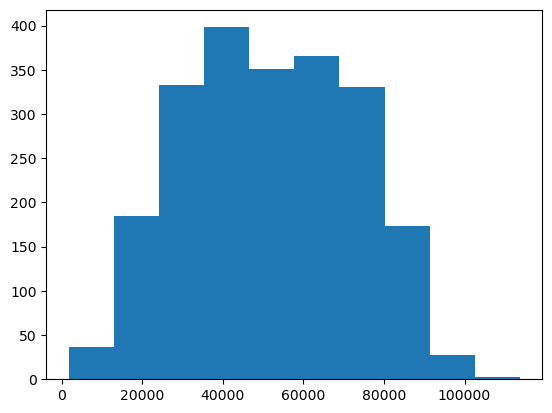

In [38]:
# Histograma da coluna Income, para verificar a distribuição de salários dos clientes, utilizando a biblioteca matplotlib.pyplot 
plt.hist(df["Income"], bins = 10)

<Axes: >

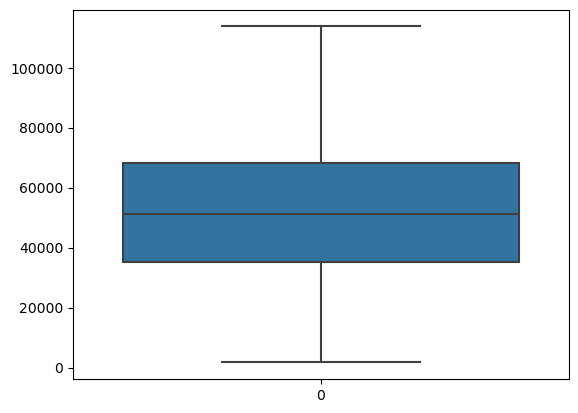

In [39]:
# Boxplot da coluna Income, para verificar a distribuição de salários dos clientes, utilizando a biblioteca seaborn 
sns.boxplot(df["Income"])

In [40]:
# Cálculo do coeficiente de variação (CV)
df["Income"].std()/df["Income"].mean() * 100

40.12441554786958

In [41]:
# Cálculo do skew (assimetria), onde skew = 0 = simétrica/normal, skew > 0 = assimétrica positivo e skew < 0 = assimétrica negativa 
df["Income"].skew() 

0.013164263414417078

De acordo com o histograma e o skew, verificamos que a curva de distribuição se assemelha à uma normal. Ou seja, poucos clientes ganham muito assim como poucos ganham pouco.
O boxplot não acusa outliers, porém há uma dispersão relativamente alta dos dados em relação à média (40%).

### Nossos clientes tem níveis de educação maiores ou menores?

<Axes: xlabel='education_level', ylabel='count'>

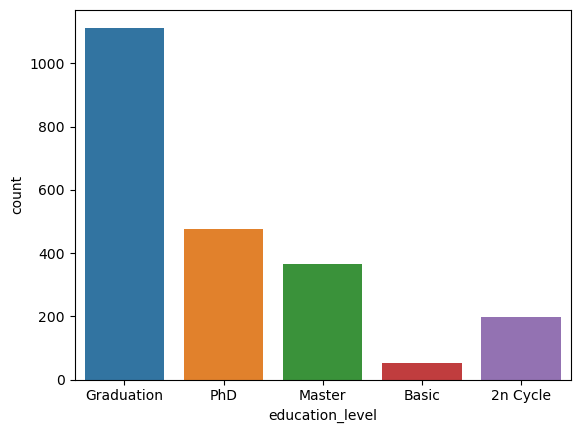

In [44]:
# Gráfico de barras do nível educacional dos clientes
sns.countplot(x=df["education_level"])

De acordo com o gráfico, a maior parte dos clientes possui, no mínimo, a graduação completa. Poucos clientes possuem somente o nível básico de ensino. Sendo assim, de modo geral, os cliente possuem níveis educacionais maiores.

### Quantos clientes temos em cada estado civil?

<Axes: xlabel='marital_status', ylabel='count'>

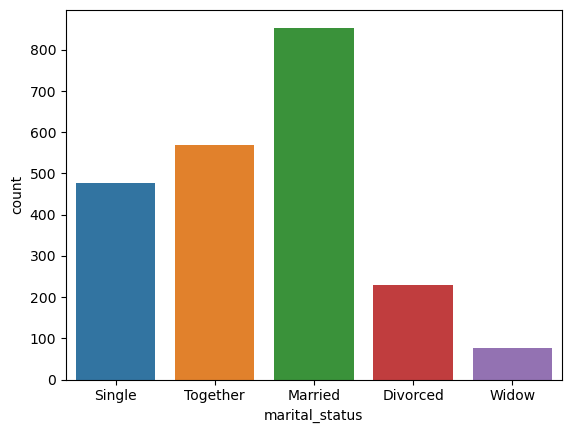

In [47]:
# Gráfico de barras do estado civil dos clientes
sns.countplot(x=df["marital_status"])

In [48]:
# Criação de variável para armazenar a quantidade de clientes para cada estado civil
marital_count = df.marital_status.value_counts()

In [49]:
# Cálculo da porcentagem de clientes para cada estado civil
marital_percent = marital_count / len(df) * 100
print(marital_percent)

marital_status
Married     38.730159
Together    25.759637
Single      21.632653
Divorced    10.430839
Widow        3.446712
Name: count, dtype: float64


É possível verificar que a maior parte dos clientes (64,5%) possui uma união estável, são casados (Married - 38,7%) ou moram juntos (Together - 25,7%). Apenas 3,4% dos clientes são viúvos (Widow). 

## - Correlação dos dados

### Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos?

<Axes: xlabel='marital_status', ylabel='kids'>

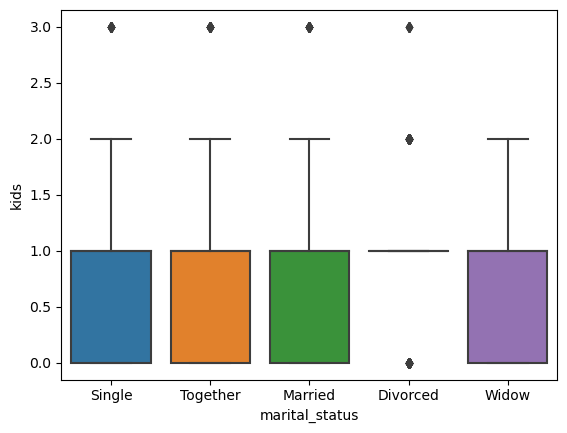

In [53]:
# Distribuição da quantidade de filhos nos diferentes estados civis
sns.boxplot(x = "marital_status", y = "kids", data = df)

In [54]:
# Descrevendo as medidas de estatística descritiva agrupadas das colunas de estado civíl e quantidade de filhos
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


O boxplot demonstra distribuições muito semelhantes de quantidade de filhos em todas as categorias de estado civil, exceto no grupo de divorciados (Divorced), onde a maior parte dos dados dessa categoria se concentra no valor 1, fazendo com que os demais valores sejam percebidos como outliers.

A mediana de todas as categorias é igual, e as médias muito próximas.

Baseado apenas na média, o grupo de solteiros (Single) possui a menor média de filhos, enquanto o grupo de divorciados (Divorced) possui a maior média de filhos.

Porém, as diferenças concretas entre os grupos só poderiam ser discriminadas através de testes de hipótese.

### As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?

<Axes: xlabel='kids', ylabel='expenses'>

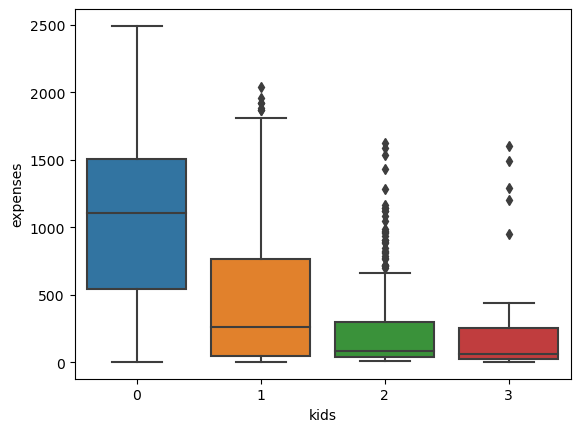

In [57]:
# Distribuição dos gastos de acordo com a quantidade de filhos
sns.boxplot(x = "kids", y = "expenses", data = df)

In [58]:
# Descrevendo as medidas de estatística descritiva agrupadas das colunas de quantidade de filhos e gasto
df.groupby(["kids"])["expenses"].describe()

,count,mean,std,min,25%,50%,75%,max
kids,,,,,,,,
0,628.0,1041.207006,625.734894,5.0,546.00,1106.5,1505.50,2491.0
1,1112.0,434.530576,452.606603,4.0,50.00,264.0,762.25,2036.0
2,415.0,221.568675,290.259678,8.0,39.00,84.0,296.50,1627.0
3,50.0,237.380000,390.174157,6.0,28.25,62.0,254.00,1601.0


Avaliando o gráfico, médias e medianas, pessoas que não possuem filhos tendem a ter um gasto maior na plataforma, com uma distribuição aparentemente mais próxima de uma normal.

Nota-se que os grupos com 2 e 3 filhos possuem médias muito superior à mediana, indício de presença de outliers acima do limite superior, que podem ser verificados no gráfico. O grupo com apenas 1 filho também possui essa característica, porém de forma menos acentuada.

O grupo com 3 filhos possui uma média maior que o grupo com 2 filhos, enquanto nos valores de mediana, a situação inverte. Esse efeito se dá pela presença de outliers de valores altos que deslocam a média para cima.

### Pessoas que têm um maior salário gastam mais?

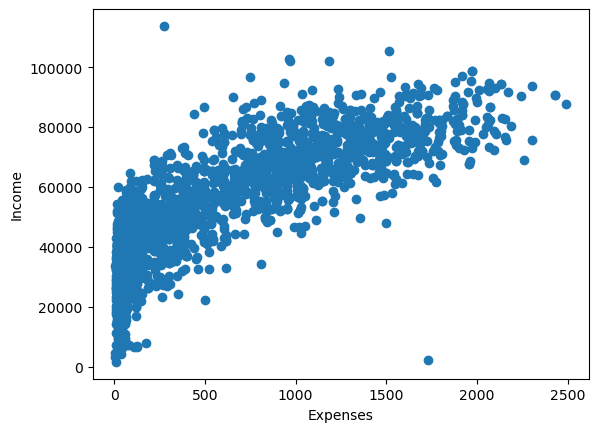

In [61]:
# Gráfico de dispersão de gastos vs salário
plt.scatter(df["expenses"], df["Income"])
plt.xlabel("Expenses")
plt.ylabel("Income")
plt.show()

A partir da forma como os dados se distribuem no gráfico é possível observar uma provável correlação diretamente proporcional. Ou seja, há uma tendência maior de gastos quanto maior o salário.

### Conclusões

Possuímos uma base de clientes com salários distribuídos de forma quase normal, onde poucos clientes ganham muito e poucos clientes ganham pouco. A partir da observação gráfica da relação entre gastos (expenses) e salário (Income), é possível verificar uma relação diretamente proporcional. No geral, a maioria dos clientes possui um nível elevado de educação (education_level), com no mínimo graduação completa, e poucos clientes concluíram apenas o ensino básico.

Apenas com as técnicas de estatística descritiva não é possível definir as diferenças de quantidade de filhos (kids) entre as categorias de estado civil (marital_status), tendo em vista que as médias são muito próximas e os valores de mediana iguais. Sendo assim, para definir as diferenças, se faz necessário o uso de testes de hipótese.

Ainda sim, foi possível verificar que o grupo de clientes que não possuem filhos têm uma média de gasto (expenses) maior em relação aos grupos que possuem filhos. E é possível perceber que conforme a quantidade de filhos aumenta, há uma tendência de diminuição dos gastos.

## - Proposta

Com o intuito de atrair mais clientes, mediante a conclusão de que pessoas sem filhos gastam mais do que pessoas com mais filhos. Nossa equipe de Marketing propôs campanhas direcionadas ao grupo de pessoas com filhos (independente da quantidade), porém existe a necessidade de comprovar se de fato as médias de gastos dos grupos é diferente. Portanto conduziremos duas análises:

- **Análise 1:** Comparação da média de gastos de pessoas sem filhos e pessoas com filhos.
- **Análise 2:** Comparação dos grupos de pessoas com filhos e verificação da existência de diferenças de gastos (expenses) de quem tem 1, 2, 3 ou mais filhos para que o time de Marketing possam afunilar mais ainda a campanha. A média desses grupos é diferente? Qual(is) tem menor média?

### Definição de hipóteses

***Análise 1***
- Hipótese nula (H0): média de gastos de pessoas sem filhos = média de gastos de pessoas com filhos
- Hipótese alternativa (Ha): média de gastos de pessoas sem filhos ≠ média de gastos de pessoas com filhos

***Análise 2***
- Hipótese nula (H0): a média de gastos de pessoas com filhos é igual independente da quantidade de filhos.
```
média de gastos de pessoas com 1 filho = média de gastos de pessoas com 2 filhos = média de gastos de pessoas com 3 filhos
```
- Hipótese alternativa (Ha): pelo menos uma das médias é diferente.
```
média de gastos de pessoas com 1 filho ≠ média de gastos de pessoas com 2 filhos ≠ média de gastos de pessoas com 3 filhos
```

### Definição do nível de significância (alpha)

O nível de significância utilizado será de 5%, o que se traduz em 95% de confiança.

In [69]:
alpha = 0.05

### Análise 1

In [71]:
# Criação de uma coluna com os gastos (expenses) de pessoas com filhos
df["expenses_kids"] = np.where(df["kids"] != 0, df["expenses"], np.NaN)

# Criação de uma coluna com os gastos (expenses) de pessoas sem filhos
df["expenses_no_kids"] = np.where(df["kids"] == 0, df["expenses"], np.NaN)

In [72]:
# Contagem de valores não nulos na coluna expenses_kids
num_expenses_kids = df["expenses_kids"].count()
print (num_expenses_kids)

1577


In [73]:
# Contagem de valores não nulos na coluna expenses_no_kids
num_expenses_no_kids = df["expenses_no_kids"].count()
print (num_expenses_no_kids)

628


In [88]:
# Importação do módulo stats da biblioteca scipy para performar os testes de hipóteses
import scipy.stats as stats

In [75]:
# Remoção de valores nulos para performance do cálculo estatístico
sample_kids = df["expenses_kids"].dropna()
sample_no_kids = df["expenses_no_kids"].dropna()

In [76]:
# Cálculo das médias amostrais
print("Média sample_kids:", sample_kids.mean())
print("Média sample_no_kids:", sample_no_kids.mean())

Média sample_kids: 372.23715916296766
Média sample_no_kids: 1041.2070063694268


In [90]:
# Cálculo de estatística t e seu p-valor
t, pvalue = stats.ttest_ind(sample_kids, sample_no_kids)

In [78]:
t, pvalue

(-28.902593571564687, 5.171525024868465e-156)

In [79]:
# Transformação e impressão dos valores para melhor visualização dos resultados
print('stat=%.3f, p=%.156f' % (t, pvalue))

stat=-28.903, p=0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000005


In [80]:
# Comparação do p-valor com o nível de significância (alpha)
if pvalue < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre as médias de gastos de pessoas com e sem filhos")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as médias de gastos de pessoas com e sem filhos são diferentes.")

Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre as médias de gastos de pessoas com e sem filhos


#### Conclusão

Mediante o valor extremamente baixo de p-valor resultante do Teste T de Student para comparar as médias de gastos de pessoas com e sem filhos, conclui-se que existe uma diferença estatisticamente significativa entre as médias desses dois grupos.

A partir deste achado, a equipe de Marketing poderá atribuir, com confiança, recursos para campanhas direcionadas aos clientes que possuem filhos.

### Análise 2

In [104]:
# Contagem de clientes com 0, 1, 2 ou 3 filhos
df.kids.value_counts()

kids
1    1112
0     628
2     415
3      50
Name: count, dtype: int64

In [106]:
# Cálculo da média de gastos (expenses) de acordo com a quantidade de filhos
df.groupby(["kids"]).expenses.mean()

kids
0    1041.207006
1     434.530576
2     221.568675
3     237.380000
Name: expenses, dtype: float64

In [84]:
# Divisão das amostras de acordo com o número de filhos retirando valores nulos
kids_1 = df[df["kids"] == 1].expenses.dropna()
kids_2 = df[df["kids"] == 2].expenses.dropna()
kids_3 = df[df["kids"] == 3].expenses.dropna()

In [92]:
# Cálculo de estatística Barlett para verificar homogeneidade de variâncias (variâncias iguais)
stats.bartlett(kids_1, kids_2, kids_3)

BartlettResult(statistic=102.2171977024388, pvalue=6.365280420289193e-23)

In [94]:
# Comparação do p-valor com o nível de significância (alpha)
if pvalue < alpha:
    print("As variâncias são diferentes")
else:
    print("As variâncias são iguais")

As variâncias são diferentes


In [ ]:
# Instalação da biblioteca de pacote estatístico
!pip install pingouin

In [97]:
# Importação da biblioteca para operar os testes de hipótese
import pingouin as pg

In [98]:
# Cálculo de estatística Anova Welch devido as variâncias diferentes entre as amostras
df_kids = df[df.kids != 0]
anova_welch = pg.welch_anova(dv="expenses", between="kids", data=df_kids)
pvalue = anova_welch["p-unc"].values[0]

In [99]:
# Comparação do p-valor com o nível de significância (alpha)
if pvalue < alpha:
    print("Rejeitamos a hipótese nula. Pelo menos uma das médias é diferente.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as médias de gastos de pessoas com filhos independente da quantidade seja diferente.")

Rejeitamos a hipótese nula. Pelo menos uma das médias é diferente.


In [112]:
# Cálculo de estatística Post Hoc Games Howell, devido as variâncias diferentes entre as amostras
games_howell = pg.pairwise_gameshowell(dv="expenses", between="kids", data=df_kids)
games_howell

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,434.530576,221.568675,212.961901,19.678256,10.822194,1152.588538,2.596812e-13,0.513077
1,1,3,434.530576,237.380000,197.150576,56.823741,3.469511,55.099957,2.888048e-03,0.437688
2,2,3,221.568675,237.380000,-15.811325,56.988869,-0.277446,55.722906,9.584865e-01,-0.052201


In [114]:
# Armazenagem dos p-valores de cada comparação entre os grupos com 1, 2 ou 3 filhos.
pvalue1_2 = games_howell["pval"].values[0]
pvalue1_3 = games_howell["pval"].values[1]
pvalue2_3 = games_howell["pval"].values[2]

In [116]:
# Verificação da significância estatística para a comparação entre os grupos com 1 filho e 2 filhos 
if pvalue1_2 < alpha:
    print("Rejeitamos a hipótese nula. A média de gastos de pessoas com 1 filho é diferente da média de gasto de pessoas com 2 filhos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as médias de gastos de pessoas com 1 ou 2 filhos seja diferente.")

Rejeitamos a hipótese nula. A média de gastos de pessoas com 1 filho é diferente da média de gasto de pessoas com 2 filhos.


In [122]:
# Verificação da significância estatística para a comparação entre os grupos com 1 filho e 3 filhos 
if pvalue1_3 < alpha:
    print("Rejeitamos a hipótese nula. A média de gastos de pessoas com 1 filho é diferente da média de gasto de pessoas com 3 filhos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as médias de gastos de pessoas com 1 ou 3 filhos seja diferente.")

Rejeitamos a hipótese nula. A média de gastos de pessoas com 1 filho é diferente da média de gasto de pessoas com 3 filhos.


In [124]:
# Verificação da significância estatística para a comparação entre os grupos com 2 filhos e 3 filhos 
if pvalue2_3 < alpha:
    print("Rejeitamos a hipótese nula. A média de gastos de pessoas com 2 filhos é diferente da média de gasto de pessoas com 3 filhos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as médias de gastos de pessoas com 2 ou 3 filhos seja diferente.")

Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as médias de gastos de pessoas com 2 ou 3 filhos seja diferente.


#### Conclusão

O grupo de clientes com apenas 1 filho (média = 434,53) apresentou média de gastos estatisticamente diferente dos grupos com 2 filhos (média = 221,56)  ou 3 filhos (média = 237,38). Entretanto, os clientes com 2 ou 3 filhos não apresentaram diferenças estatisticamente significativas na média de gastos.

O foco das campanhas publicitárias poderia ser tanto o grupo de clientes com 2 filhos quanto o grupo de clientes com 3 filhos.

Considerando o objetivo da equipe de Marketing, o ideal é concentrar os recursos no grupo com menor média, levando em consideração o volume de clientes. Portanto, a recomendação baseada nos dados desta amostra de clientes iFood, é focar no grupo de clientes com 2 filhos.
